In [7]:
import importlib
import os, pandas as pd, numpy as np
from joblib import dump, load
import sys
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
# from sod.core.evaluation import normalize
import sod.core.dataset as sod_core_dataset
importlib.reload(sod_core_dataset)
import sod.core.plot as sod_plot
importlib.reload(sod_plot)
# from sod.core.dataset import open_dataset # , normalize_df
# from sod import plot
isoutl = sod_core_dataset.is_outlier

dataframe = sod_core_dataset.open_dataset('globalset.hdf', normalize=False, verbose=False)
print(sod_core_dataset.dfinfo(dataframe))

clf_iso_cont_5perc = load(os.path.abspath(os.path.join(os.getcwd(), '..', 'evaluations', 'results', 'cv.oneminutewindows.iforest.yaml',
                         'IsolationForest?features=psd@2sec,psd@5sec&contamination=0.005&max_samples=16384&n_estimators=100&behaviour=new.model')))
# print(str(clf50))
# print(str(clf_iso_cont_5perc))


# Copriamo tutti i casi: frequenze basse e frequenze medio alte (locali)
# psd0.2 psd5


ok (1292496 instances)
                         Min      Median           Max    #NAs  #<1Perc.  #>99Perc.
psd@0.05sec     -3076.526611 -121.308497    -18.616519  459884         0       8327
psd@0.1sec      -3076.526611 -125.424136    -18.540183       0     12925      12925
psd@0.2sec      -3076.526611 -127.765697    -18.394193       1     12925      12925
psd@0.5sec      -3076.526611 -129.623496    -17.799973       4     12925      12925
psd@1sec        -3076.526611 -126.375366    -17.364621      10     12925      12924
psd@2sec        -3076.526611 -122.544242    -14.675753      21     12925      12925
psd@3sec        -3076.526611 -121.844490     -7.249915      54     12925      12925
psd@5sec        -3076.526611 -123.907524      7.845090      56     12925      12924
psd@9sec        -3076.526611 -132.449921     19.164349   27289     12653      12653
amplitude_ratio     0.000000    0.001026     36.623112       0     12907      11374
magnitude           0.900000    4.700000      8.9000

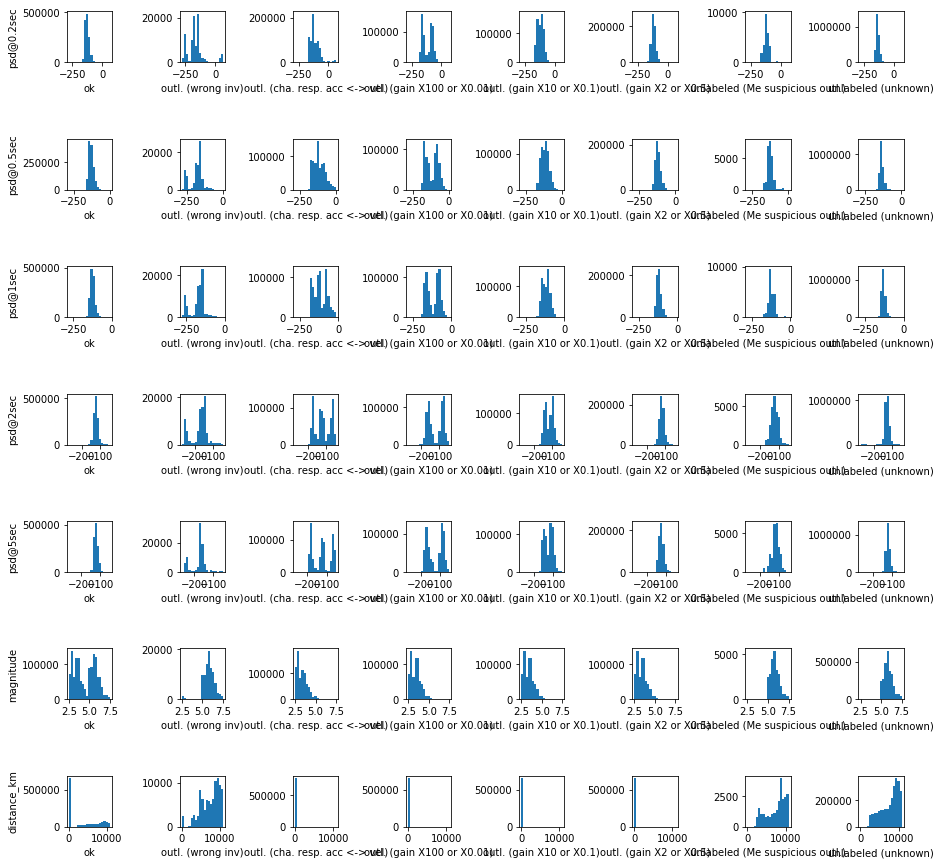

In [6]:
import importlib
import sod.core.plot as sod_plot
importlib.reload(sod_plot)

%matplotlib inline


fig = sod_plot.plotdist(dataframe,
                        ['psd@0.2sec', 'psd@0.5sec', 'psd@1sec', 'psd@2sec', 'psd@5sec', 'magnitude', 'distance_km'],
                        axis_lim=0.99)


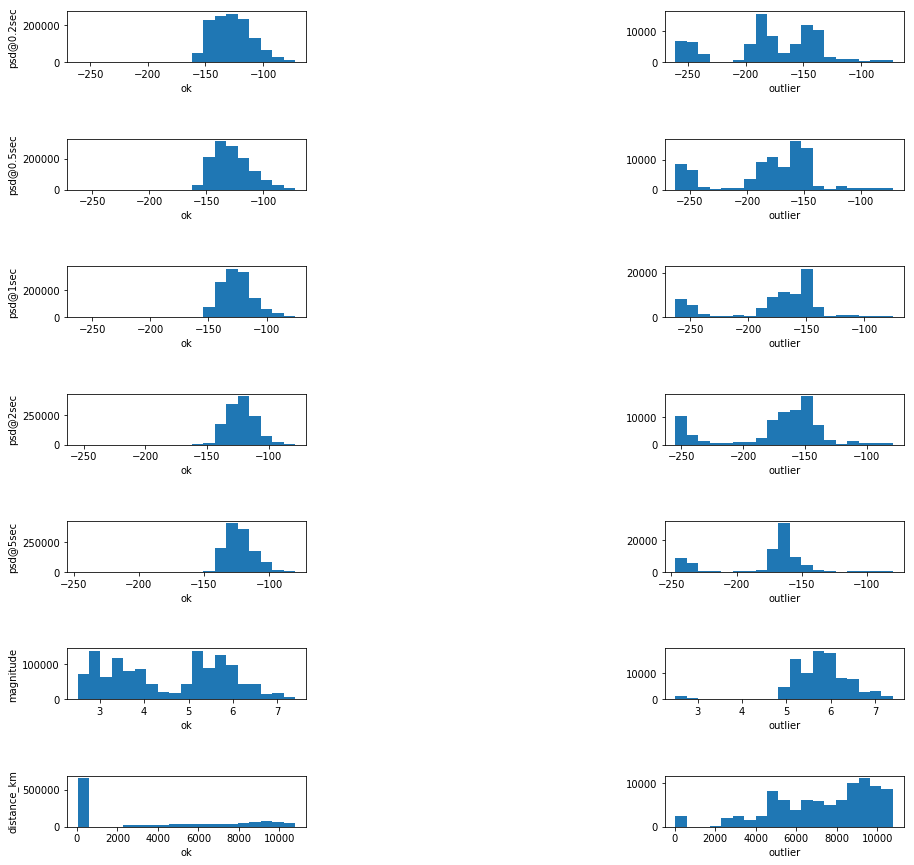

In [14]:
# we want to plot inliers and outliers only:
import sod.core.dataset as sod_core_dataset
importlib.reload(sod_core_dataset)
from sod.core import pdconcat
import importlib
import sod.core.plot as sod_plot
importlib.reload(sod_plot)

%matplotlib inline

columns = ['psd@0.2sec', 'psd@0.5sec', 'psd@1sec', 'psd@2sec', 'psd@5sec', 'magnitude', 'distance_km']

dinfo = sod_core_dataset.dataset_info(dataframe)
dataframe2 = pdconcat([
                      dataframe[dinfo.class_selector[dinfo.classnames[0]](dataframe)],
                      dataframe[dinfo.class_selector[dinfo.classnames[1]](dataframe)]
                     ])

dataframe2 = dataframe2.rename({'globalset.id': 'id'}, axis=1)

fig = sod_plot.plotdist(
    dataframe2,
    ['psd@0.2sec', 'psd@0.5sec', 'psd@1sec', 'psd@2sec', 'psd@5sec', 'magnitude', 'distance_km'],
    axis_lim=0.99
)


In [34]:
# We spotted some artifacts (with psd* < -3000) in the inliers. What should we do?
# We test here how many are them, and if there are stations which have ONLY those kind of artifacted segments
# As there is no such station, it really means it suggests it is some computational artifact we must take into account

uis = set()
th = -3000
for c in columns[:-2]:
    df_ = dataframe[dataframe[c] <= th]
    us = pd.unique(df_.station_id)
    uis |= set(us.tolist())
    df_2 = dataframe[dataframe[c] > th]
    us_2 = pd.unique(df_2.station_id)
    stas_wrong_only = set(us.tolist()) - set(us_2.tolist())
    print("%s:\n  %d items <= %.2f (belonging to %d distinct stations. %d of those stations have **only** these kind of segments (< %f)" % 
          (c, len(df_), th, len(us), len(stas_wrong_only), th))
print('Totally %d unique stations found' % len(uis))

psd@0.2sec:
  67679 items <= -3000.00 (belonging to 205 distinct stations. 0 of those stations have **only** these kind of segments (< -3000.000000)
psd@0.5sec:
  67679 items <= -3000.00 (belonging to 205 distinct stations. 0 of those stations have **only** these kind of segments (< -3000.000000)
psd@1sec:
  67676 items <= -3000.00 (belonging to 205 distinct stations. 0 of those stations have **only** these kind of segments (< -3000.000000)
psd@2sec:
  67676 items <= -3000.00 (belonging to 205 distinct stations. 0 of those stations have **only** these kind of segments (< -3000.000000)
psd@5sec:
  67676 items <= -3000.00 (belonging to 205 distinct stations. 0 of those stations have **only** these kind of segments (< -3000.000000)
Totally 205 unique stations found
